In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [12]:
import tensorflow as tf
import json
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Load dataset

In [6]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json -O "/content/gdrive/MyDrive/AI/GoogleMLDevelopersBootcampEurope/TF/Datasets/sarcasm.json"

--2022-10-19 16:21:53--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c0d::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/content/gdrive/MyDrive/AI/GoogleMLDevelopersBootcampEurope/TF/Datasets/sarcasm.json’

/content/gdrive/MyD 100%[===================>]   5.38M  --.-KB/s    in 0.1s    

2022-10-19 16:21:53 (46.5 MB/s) - ‘/content/gdrive/MyDrive/AI/GoogleMLDevelopersBootcampEurope/TF/Datasets/sarcasm.json’ saved [5643545/5643545]



In [8]:
# Load the JSON file
with open("Datasets/sarcasm.json", 'r') as f:
    news_datastore = json.load(f)

print(news_datastore[0])

urls = []
sentences = []
labels = []

for item in news_datastore:
    urls.append(item['article_link'])
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

print(len(sentences))

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}
26709


In [13]:
x_train, x_test, y_train, y_test = train_test_split(sentences,labels,test_size=0.251)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
print("Train => ",x_train.shape,y_train.shape)
print("Test => ",x_test.shape,y_test.shape)

Train =>  (20005,) (20005,)
Test =>  (6704,) (6704,)


### Text preprocessing

In [15]:
vec_layer_sentence = tf.keras.layers.TextVectorization(max_tokens = 10000,
                                                       output_mode='int',
                                                       output_sequence_length=120)
vec_layer_sentence.adapt(x_train)
vectorized_x_train = vec_layer_sentence(x_train)
vectorized_x_test = vec_layer_sentence(x_test)
print("Vocab size = ",vec_layer_sentence.vocabulary_size())
print(vectorized_x_train[0])
print(vectorized_x_test[1])

Vocab size =  10000
tf.Tensor(
[1335  125 1283   69 3781   86  812 1319    3    4   52    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0], shape=(120,), dtype=int64)
tf.Tensor(
[  23   47 1308    1    1 7518 2362  198  287 1735  172 1256    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0 

In [18]:
def plot_graphs(model_hist, string):
  plt.plot(model_hist.history[string])
  plt.plot(model_hist.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

## Single-layer LSTM

In [16]:
sarcasm_single_lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000,output_dim=16,input_length=120),

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=32)), #activation='tanh'

    tf.keras.layers.Dense(units=24,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

sarcasm_single_lstm_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

sarcasm_single_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________


In [17]:
sarcasm_single_lstm_model_hist = sarcasm_single_lstm_model.fit(x=vectorized_x_train, y=y_train,
                                                               epochs=10,
                                                               validation_data=(vectorized_x_test,y_test))

Epoch 1/10
626/626 [==============================] - 56s 84ms/step - loss: 0.4081 - accuracy: 0.8009 - val_loss: 0.3326 - val_accuracy: 0.8540
Epoch 2/10
626/626 [==============================] - 50s 79ms/step - loss: 0.2242 - accuracy: 0.9093 - val_loss: 0.3454 - val_accuracy: 0.8567
Epoch 3/10
626/626 [==============================] - 59s 94ms/step - loss: 0.1501 - accuracy: 0.9425 - val_loss: 0.3784 - val_accuracy: 0.8516
Epoch 4/10
626/626 [==============================] - 49s 78ms/step - loss: 0.0937 - accuracy: 0.9654 - val_loss: 0.4601 - val_accuracy: 0.8393
Epoch 5/10
626/626 [==============================] - 48s 76ms/step - loss: 0.0589 - accuracy: 0.9801 - val_loss: 0.5248 - val_accuracy: 0.8392
Epoch 6/10
626/626 [==============================] - 47s 76ms/step - loss: 0.0418 - accuracy: 0.9863 - val_loss: 0.7337 - val_accuracy: 0.8347
Epoch 7/10
626/626 [==============================] - 51s 81ms/step - loss: 0.0266 - accuracy: 0.9916 - val_loss: 0.9245 - val_accuracy:

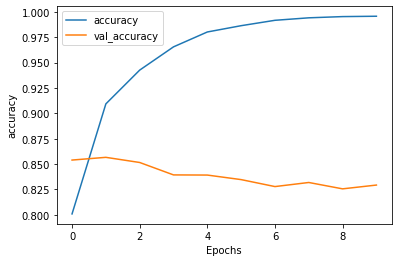

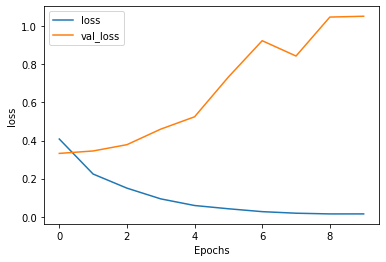

In [19]:
plot_graphs(sarcasm_single_lstm_model_hist, "accuracy")
plot_graphs(sarcasm_single_lstm_model_hist, "loss")

## CNN

In [20]:
sarcasm_cnn_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000,output_dim=16,input_length=120),

    tf.keras.layers.Conv1D(filters=128,kernel_size=5,activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),

    tf.keras.layers.Dense(units=24,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

sarcasm_cnn_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

sarcasm_cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 24)                3096      
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 173,489
Trainable params: 173,489
Non-trainable params: 0
________________________________________________

In [21]:
sarcasm_cnn_model_hist = sarcasm_cnn_model.fit(x=vectorized_x_train, y=y_train,
                                               epochs=10,
                                               validation_data=(vectorized_x_test,y_test))

Epoch 1/10
626/626 [==============================] - 10s 15ms/step - loss: 0.4547 - accuracy: 0.7652 - val_loss: 0.3575 - val_accuracy: 0.8419
Epoch 2/10
626/626 [==============================] - 9s 15ms/step - loss: 0.2361 - accuracy: 0.9048 - val_loss: 0.3603 - val_accuracy: 0.8502
Epoch 3/10
626/626 [==============================] - 9s 15ms/step - loss: 0.1234 - accuracy: 0.9562 - val_loss: 0.4422 - val_accuracy: 0.8462
Epoch 4/10
626/626 [==============================] - 9s 14ms/step - loss: 0.0552 - accuracy: 0.9826 - val_loss: 0.5627 - val_accuracy: 0.8404
Epoch 5/10
626/626 [==============================] - 9s 14ms/step - loss: 0.0209 - accuracy: 0.9944 - val_loss: 0.6991 - val_accuracy: 0.8364
Epoch 6/10
626/626 [==============================] - 9s 15ms/step - loss: 0.0086 - accuracy: 0.9976 - val_loss: 0.8430 - val_accuracy: 0.8347
Epoch 7/10
626/626 [==============================] - 9s 15ms/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.8883 - val_accuracy: 0.831

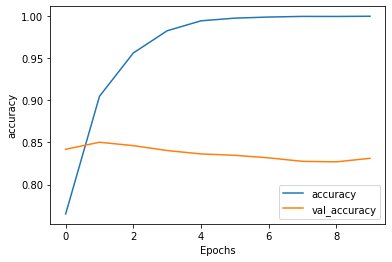

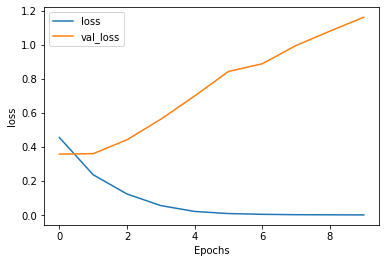

In [22]:
plot_graphs(sarcasm_cnn_model_hist, "accuracy")
plot_graphs(sarcasm_cnn_model_hist, "loss")